#### Improving Customer Retention Through Personalized Loyalty Programs
##### Problem Statement
Customers frequently churn due to a lack of personalized engagement and incentives to stay loyal.  
How can the business leverage transactional and demographic data to identify at-risk customers and design targeted loyalty programs to retain them?
Our business problem is to understand customer purchasing behavior to help improve marketing strategies, product offerings, and customer engagement. Specifically, we want to answer questions
##### Objective
- Use the dataset to identify patterns in customer behavior that indicate the likelihood of churn.  
- Segment customers based on their purchase frequency, spending habits, and loyalty status.  
- Develop data-driven loyalty programs tailored to specific customer segments (e.g., discounts, exclusive rewards, or personalized offers).


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
df = pd.read_csv('shopping_trends.csv')
df.head(2)

,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Payment Method,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Preferred Payment Method,Frequency of Purchases
0,1,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,3.1,Yes,Credit Card,Express,Yes,Yes,14,Venmo,Fortnightly
1,2,19,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,3.1,Yes,Bank Transfer,Express,Yes,Yes,2,Cash,Fortnightly


In [3]:
print(df.shape)

(3900, 19)


#### EDA

In [4]:
df.columns

Index(['Customer ID', 'Age', 'Gender', 'Item Purchased', 'Category',
       'Purchase Amount (USD)', 'Location', 'Size', 'Color', 'Season',
       'Review Rating', 'Subscription Status', 'Payment Method',
       'Shipping Type', 'Discount Applied', 'Promo Code Used',
       'Previous Purchases', 'Preferred Payment Method',
       'Frequency of Purchases'],
      dtype='object')

In [5]:
df.dtypes

Customer ID                   int64
Age                           int64
Gender                       object
Item Purchased               object
Category                     object
Purchase Amount (USD)         int64
Location                     object
Size                         object
Color                        object
Season                       object
Review Rating               float64
Subscription Status          object
Payment Method               object
Shipping Type                object
Discount Applied             object
Promo Code Used              object
Previous Purchases            int64
Preferred Payment Method     object
Frequency of Purchases       object
dtype: object

In [6]:
df.isnull().sum()

Customer ID                 0
Age                         0
Gender                      0
Item Purchased              0
Category                    0
Purchase Amount (USD)       0
Location                    0
Size                        0
Color                       0
Season                      0
Review Rating               0
Subscription Status         0
Payment Method              0
Shipping Type               0
Discount Applied            0
Promo Code Used             0
Previous Purchases          0
Preferred Payment Method    0
Frequency of Purchases      0
dtype: int64

In [7]:
df.duplicated().sum()

0

In [8]:
# df.duplicated
df.drop_duplicates()

,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Payment Method,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Preferred Payment Method,Frequency of Purchases
0,1,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,3.1,Yes,Credit Card,Express,Yes,Yes,14,Venmo,Fortnightly
1,2,19,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,3.1,Yes,Bank Transfer,Express,Yes,Yes,2,Cash,Fortnightly
2,3,50,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,3.1,Yes,Cash,Free Shipping,Yes,Yes,23,Credit Card,Weekly
3,4,21,Male,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,3.5,Yes,PayPal,Next Day Air,Yes,Yes,49,PayPal,Weekly
4,5,45,Male,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,2.7,Yes,Cash,Free Shipping,Yes,Yes,31,PayPal,Annually
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3895,3896,40,Female,Hoodie,Clothing,28,Virginia,L,Turquoise,Summer,4.2,No,Cash,2-Day Shipping,No,No,32,Venmo,Weekly
3896,3897,52,Female,Backpack,Accessories,49,Iowa,L,White,Spring,4.5,No,PayPal,Store Pickup,No,No,41,Bank Transfer,Bi-Weekly
3897,3898,46,Female,Belt,Accessories,33,New Jersey,L,Green,Spring,2.9,No,Credit Card,Standard,No,No,24,Venmo,Quarterly
3898,3899,44,Female,Shoes,Footwear,77,Minnesota,S,Brown,Summer,3.8,No,PayPal,Express,No,No,24,Venmo,Weekly


In [9]:
df.describe()

,Customer ID,Age,Purchase Amount (USD),Review Rating,Previous Purchases
count,3900.000000,3900.000000,3900.000000,3900.000000,3900.000000
mean,1950.500000,44.068462,59.764359,3.749949,25.351538
std,1125.977353,15.207589,23.685392,0.716223,14.447125
min,1.000000,18.000000,20.000000,2.500000,1.000000
25%,975.750000,31.000000,39.000000,3.100000,13.000000
50%,1950.500000,44.000000,60.000000,3.700000,25.000000
75%,2925.250000,57.000000,81.000000,4.400000,38.000000
max,3900.000000,70.000000,100.000000,5.000000,50.000000


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3900 entries, 0 to 3899
Data columns (total 19 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Customer ID               3900 non-null   int64  
 1   Age                       3900 non-null   int64  
 2   Gender                    3900 non-null   object 
 3   Item Purchased            3900 non-null   object 
 4   Category                  3900 non-null   object 
 5   Purchase Amount (USD)     3900 non-null   int64  
 6   Location                  3900 non-null   object 
 7   Size                      3900 non-null   object 
 8   Color                     3900 non-null   object 
 9   Season                    3900 non-null   object 
 10  Review Rating             3900 non-null   float64
 11  Subscription Status       3900 non-null   object 
 12  Payment Method            3900 non-null   object 
 13  Shipping Type             3900 non-null   object 
 14  Discount

In [11]:
df['Gender'].unique()

array(['Male', 'Female'], dtype=object)

<Axes: >

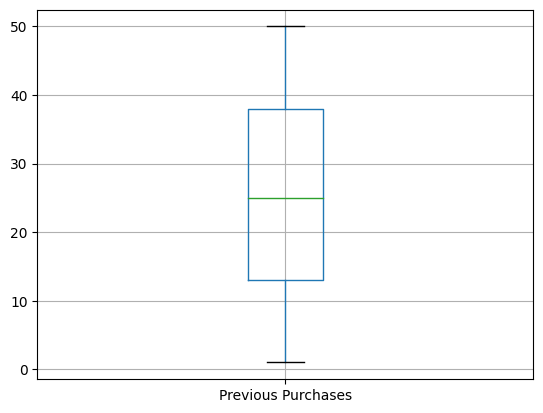

In [12]:
df.boxplot('Previous Purchases')

In [13]:
def find_outliers(df, column):
    # Calculate the first and third quartile
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)

    # Calculate the IQR
    IQR = Q3 - Q1

    # Define the lower and upper bounds for outliers
    LL = Q1 - 1.5 * IQR
    UL = Q3 + 1.5 * IQR

    # Identify outliers
    outliers = df[(df[column] < LL) | (df[column] > UL)]

    return outliers


In [14]:
df1 = find_outliers(df,'Previous Purchases')
df1

,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Payment Method,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Preferred Payment Method,Frequency of Purchases


### DAta Analytics : 5-10 reports

In [15]:
#Data Exploration - Summary of Customer Demographics
age_dist = df['Age'].value_counts().sort_index()  # Age distribution
gender_dist = df['Gender'].value_counts()  # Gender distribution
location_dist = df['Location'].value_counts()  # Location distribution

In [28]:
# 2. Customer Purchasing Behavior
# Average Purchase Amount by Age Group
# Create age groups using pd.cut
age_bins = [0, 18, 25, 35, 50, 65, 100]  # Define age ranges
age_labels = ['0-18', '19-25', '26-35', '36-50', '51-65', '65+']  # Define labels for each range
df['Age Group'] = pd.cut(df['Age'], bins=age_bins, labels=age_labels)

# Verify the new Age Group column
print(df[['Age', 'Age Group']].head())

# Analyze average purchase amount by Age Group
avg_purchase_age_group = df.groupby('Age Group')['Purchase Amount (USD)'].mean()
print(avg_purchase_age_group)


   Age Age Group
0   55     51-65
1   19     19-25
2   50     36-50
3   21     19-25
4   45     36-50
Age Group
0-18     59.985507
19-25    60.739044
26-35    59.760108
36-50    59.072007
51-65    60.281891
65+      58.884507
Name: Purchase Amount (USD), dtype: float64


In [17]:
# Average Purchase Amount by Gender
avg_purchase_age = df.groupby('Gender')['Purchase Amount (USD)'].mean()
avg_purchase_age

Gender
Female    60.249199
Male      59.536199
Name: Purchase Amount (USD), dtype: float64

In [18]:
# Count the frequency of different purchase frequencies in the dataset
purchase_frequency = df['Frequency of Purchases'].value_counts()
print(purchase_frequency)

Frequency of Purchases
Every 3 Months    584
Annually          572
Quarterly         563
Monthly           553
Bi-Weekly         547
Fortnightly       542
Weekly            539
Name: count, dtype: int64


In [19]:
# Calculate the average purchase amount for each discount applied category
discount_purchase = df.groupby('Discount Applied')['Purchase Amount (USD)'].mean()


In [20]:
# Product Category Purchases by Gender
#The unstack() function in Pandas pivots a level of a MultiIndex from rows to columns.
category_gender = df.groupby(['Gender', 'Category']).size().unstack()
category_gender

Category,Accessories,Clothing,Footwear,Outerwear
Gender,,,,
Female,392,556,199,101
Male,848,1181,400,223


#### Visualization

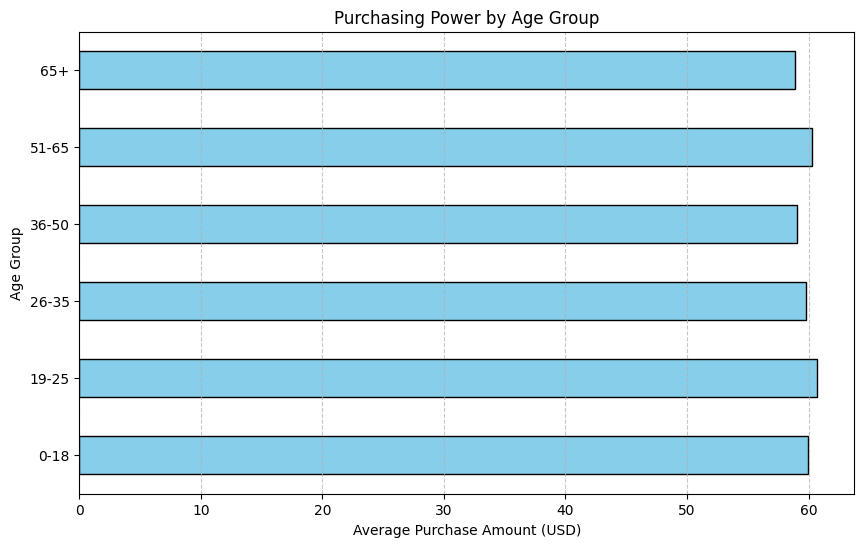

In [36]:
# Visualize Age Distribution
plt.figure(figsize=(10, 6))  # Set figure size
avg_purchase_age_group.plot(
    kind='barh',               # Create a horizontal bar chart
    color='skyblue',           # Set bar color
    edgecolor='black'          # Add borders to bars for clarity
)

plt.title('Purchasing Power by Age Group')  # Add a title
plt.xlabel('Average Purchase Amount (USD)')  # Label for the x-axis
plt.ylabel('Age Group')  # Label for the y-axis
plt.grid(axis='x', linestyle='--', alpha=0.7)  # Add grid lines for better readability
plt.show()

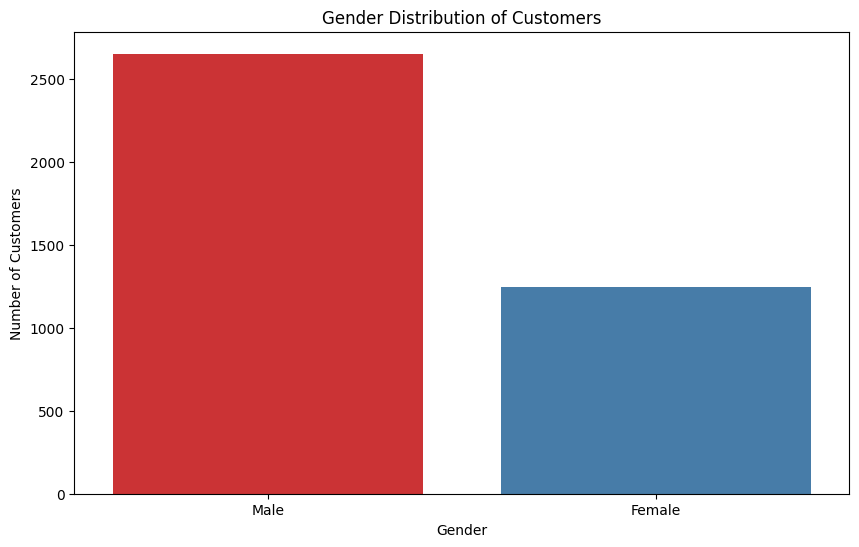

In [22]:
# Visualize Gender Distribution
plt.figure(figsize=(10, 6))
sns.barplot(x=gender_dist.index, y=gender_dist.values, palette='Set1')
plt.title('Gender Distribution of Customers')
plt.xlabel('Gender')
plt.ylabel('Number of Customers')
plt.show()

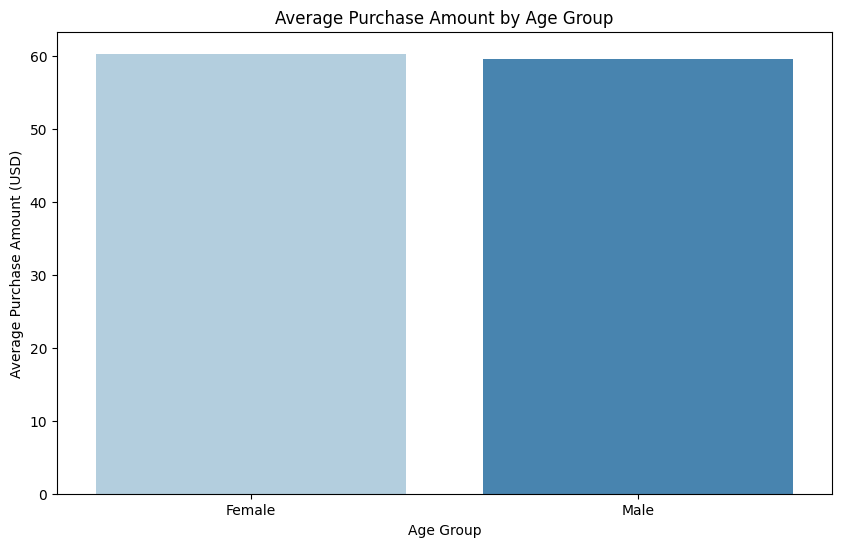

In [23]:
# Visualize Average Purchase Amount by Age Group
plt.figure(figsize=(10, 6))
sns.barplot(x=avg_purchase_age.index, y=avg_purchase_age.values, palette='Blues')
plt.title('Average Purchase Amount by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Average Purchase Amount (USD)')
plt.show()

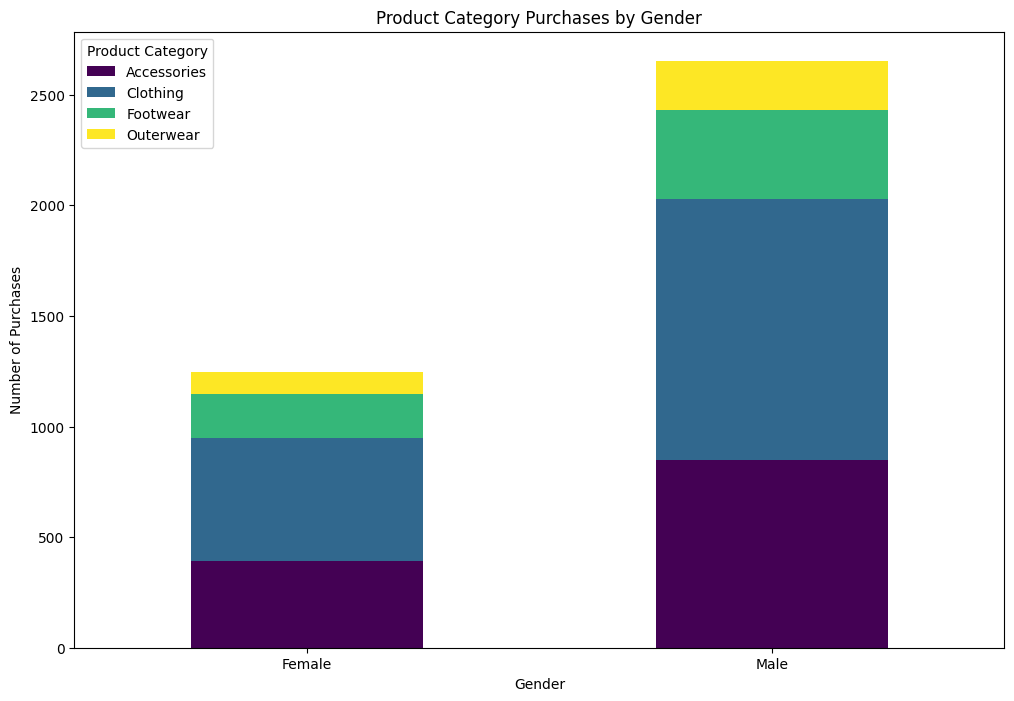

In [24]:
# Visualize Product Category Purchases by Gender
category_gender.plot(kind='bar', stacked=True, figsize=(12, 8), cmap='viridis')
plt.title('Product Category Purchases by Gender')
plt.xlabel('Gender')
plt.ylabel('Number of Purchases')
plt.xticks(rotation=0)
plt.legend(title='Product Category')
plt.show()

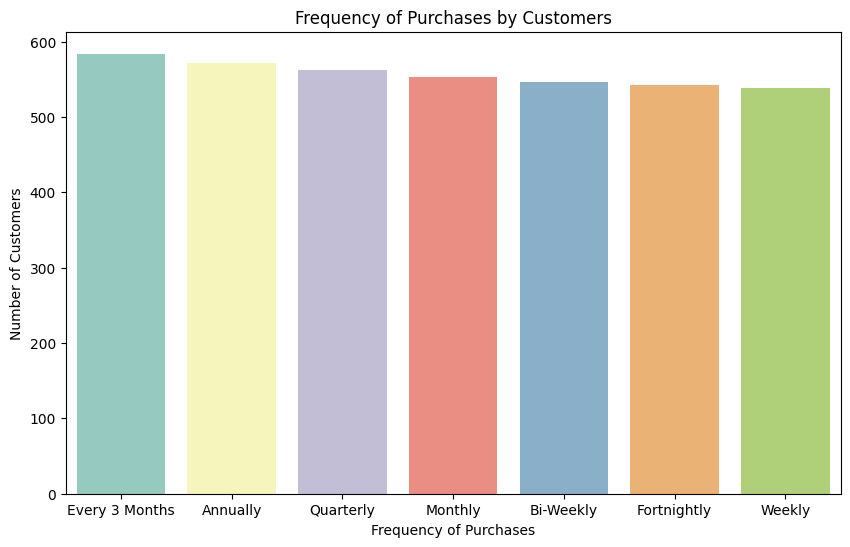

In [25]:
# Visualize frequency of purchases
plt.figure(figsize=(10, 6))
sns.barplot(x=purchase_frequency.index, y=purchase_frequency.values, palette='Set3')
plt.title('Frequency of Purchases by Customers')
plt.xlabel('Frequency of Purchases')
plt.ylabel('Number of Customers')
plt.show()


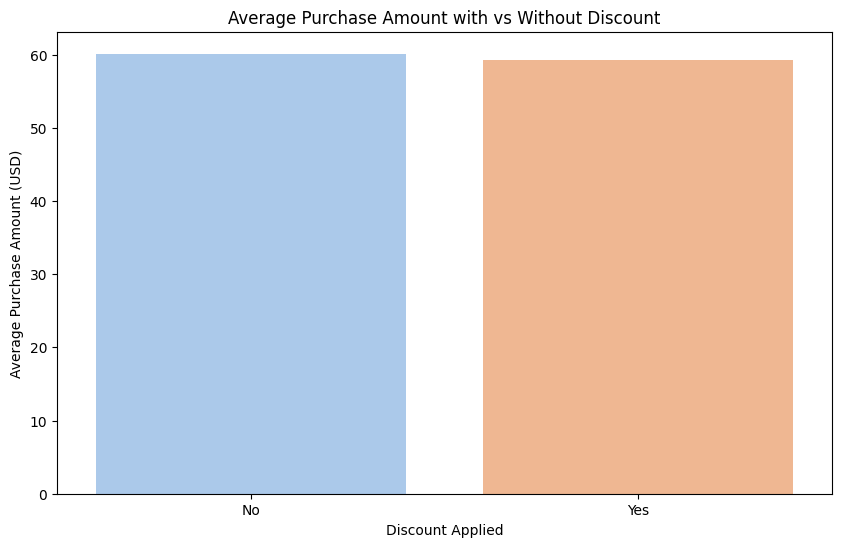

In [26]:
plt.figure(figsize=(10, 6))
sns.barplot(x=discount_purchase.index, y=discount_purchase.values, palette='pastel')
plt.title('Average Purchase Amount with vs Without Discount')
plt.xlabel('Discount Applied')
plt.ylabel('Average Purchase Amount (USD)')
plt.show()
